In [23]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(".."))
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processing import create_aggregate_features, extract_time_features, build_pipeline
# Load the uploaded dataset
df = pd.read_csv('../data/raw/data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [25]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [26]:
# Summary Statistics for Numerical Features
summary_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Extracting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Prepare results
summary_stats, missing_values, numerical_cols, categorical_cols

(       CountryCode        Amount         Value  PricingStrategy   FraudResult
 count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
 mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
 std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
 min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
 25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
 50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
 75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
 max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000,
 TransactionId           0
 BatchId                 0
 AccountId               0
 SubscriptionId          0
 CustomerId              0
 CurrencyCode            0
 CountryCode             0
 ProviderId              0
 ProductId               0
 ProductCategory         0
 ChannelId        

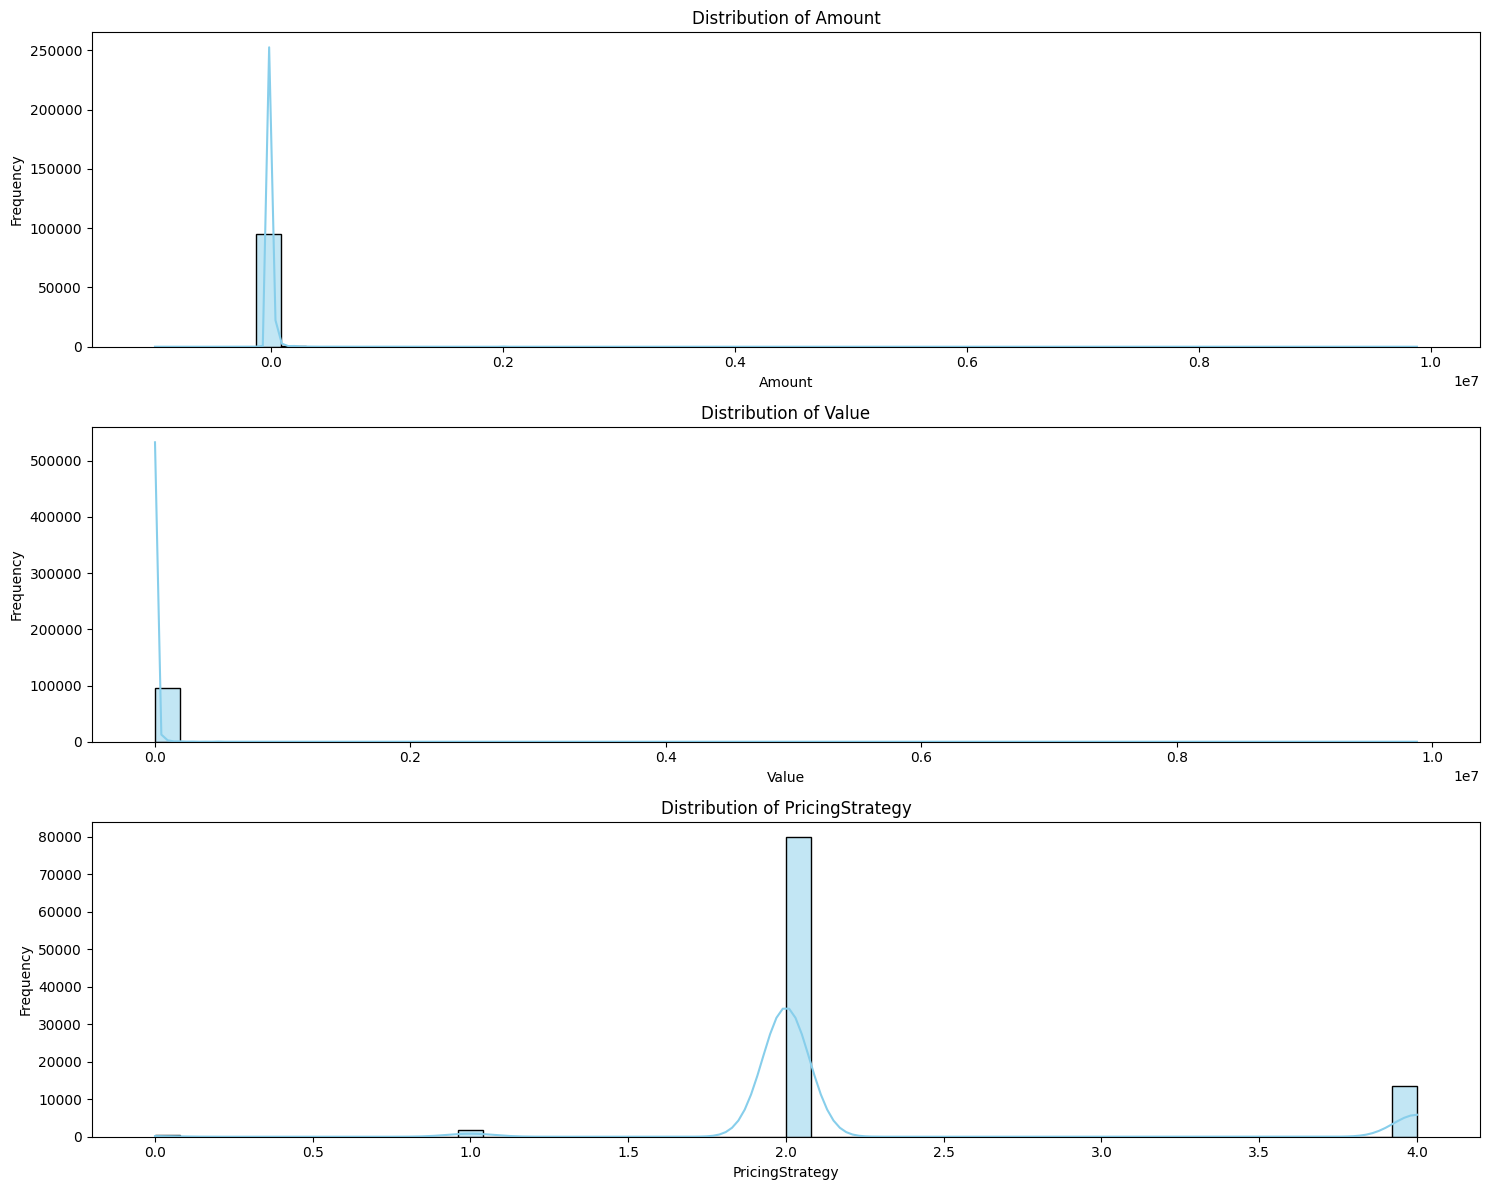

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns to visualize (excluding constant 'CountryCode')
numerical_cols = ['Amount', 'Value', 'PricingStrategy']

# Set up the plotting grid
plt.figure(figsize=(15, 12))

# Loop to plot distributions with KDE for each numerical feature
for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 1, idx + 1)
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
numerical_cols = ['Amount', 'Value']  # Add more if applicable

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
categorical_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df = extract_time_features(df)
agg_df = create_aggregate_features(df)

# Example pipeline setup
numeric_features = ['TotalAmount', 'MeanAmount', 'StdAmount', 'TransactionCount', 'TransactionHour', 'TransactionDay', 'TransactionMonth']
categorical_features = ['ProductCategory', 'ChannelId', 'PricingStrategy']

pipeline = build_pipeline(numeric_features, categorical_features)

# For modeling, fit_transform the pipeline
X = agg_df.merge(df, on='CustomerId')